In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

# Path to the dataset
data_dir = '/content/drive/My Drive/RayosX'

# Subset directory
subset_dir = '/content/RayosX_subset'
os.makedirs(subset_dir, exist_ok=True)
os.makedirs(os.path.join(subset_dir, 'train', 'NORMAL'), exist_ok=True)
os.makedirs(os.path.join(subset_dir, 'train', 'PNEUMONIA'), exist_ok=True)
os.makedirs(os.path.join(subset_dir, 'val', 'NORMAL'), exist_ok=True)
os.makedirs(os.path.join(subset_dir, 'val', 'PNEUMONIA'), exist_ok=True)

# Copy 50 images from each class
for category in ['NORMAL', 'PNEUMONIA']:
    train_files = os.listdir(os.path.join(data_dir, 'train', category))[:50]
    val_files = os.listdir(os.path.join(data_dir, 'test', category))[:50]

    for file in train_files:
        shutil.copy(os.path.join(data_dir, 'train', category, file), os.path.join(subset_dir, 'train', category))

    for file in val_files:
        shutil.copy(os.path.join(data_dir, 'test', category, file), os.path.join(subset_dir, 'val', category))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    os.path.join(subset_dir, 'train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(subset_dir, 'val'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


###Muestra de una de las imagenes medicas

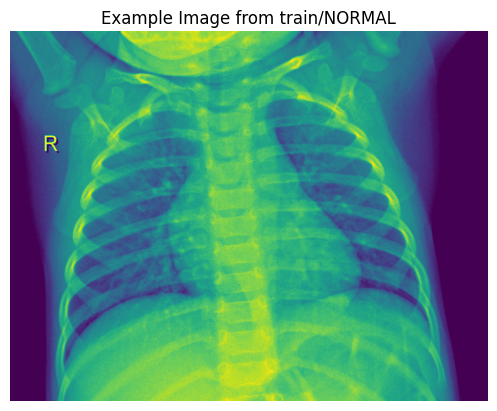

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

image_path = os.path.join(subset_dir, 'train', 'NORMAL', os.listdir(os.path.join(subset_dir, 'train', 'NORMAL'))[1])

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title('Example Image from train/NORMAL')
plt.axis('off')  # Hide axis
plt.show()

##Entrenamiento de la red

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Construir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') #por ser la ultima capa
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluar el modelo
_, acc = model.evaluate(val_generator, verbose=0)
print(f'Accuracy: {acc * 100:.2f}%')

Epoch 1/20
3/3 [==============================] - 19s 6s/step - loss: 3.7307 - accuracy: 0.4412 - val_loss: 1.8690 - val_accuracy: 0.4896
Epoch 2/20
3/3 [==============================] - 20s 6s/step - loss: 1.4551 - accuracy: 0.4062 - val_loss: 0.7690 - val_accuracy: 0.5104
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.7752 - accuracy: 0.4559 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 15s 5s/step - loss: 0.6830 - accuracy: 0.5735 - val_loss: 0.7071 - val_accuracy: 0.4896
Epoch 5/20
3/3 [==============================] - 18s 6s/step - loss: 0.6971 - accuracy: 0.5208 - val_loss: 0.7237 - val_accuracy: 0.5312
Epoch 6/20
3/3 [==============================] - 16s 6s/step - loss: 0.7112 - accuracy: 0.4706 - val_loss: 0.7250 - val_accuracy: 0.5104
Epoch 7/20
3/3 [==============================] - 16s 8s/step - loss: 0.6937 - accuracy: 0.5294 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 8/20
3/3 [==================

Si bien aun no vemos esto, podemos usar los conceptos de entropía que explicaron en clase, gradiente, entre otros.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Construir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Evaluar el modelo
_, acc = model.evaluate(val_generator, verbose=0)
print(f'Accuracy: {acc * 100:.2f}%')

Epoch 1/20
3/3 [==============================] - 22s 7s/step - loss: 1.8940 - accuracy: 0.4583 - val_loss: 0.8057 - val_accuracy: 0.5208
Epoch 2/20
3/3 [==============================] - 15s 5s/step - loss: 0.7079 - accuracy: 0.5294 - val_loss: 0.7265 - val_accuracy: 0.5104
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.6981 - accuracy: 0.5441 - val_loss: 0.7023 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 15s 5s/step - loss: 0.7055 - accuracy: 0.5147 - val_loss: 0.6951 - val_accuracy: 0.3750
Epoch 5/20
3/3 [==============================] - 16s 5s/step - loss: 0.6877 - accuracy: 0.5441 - val_loss: 0.7080 - val_accuracy: 0.4896
Epoch 6/20
3/3 [==============================] - 15s 5s/step - loss: 0.7020 - accuracy: 0.5000 - val_loss: 0.7138 - val_accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 15s 5s/step - loss: 0.7030 - accuracy: 0.5294 - val_loss: 0.7032 - val_accuracy: 0.5104
Epoch 8/20
3/3 [==================

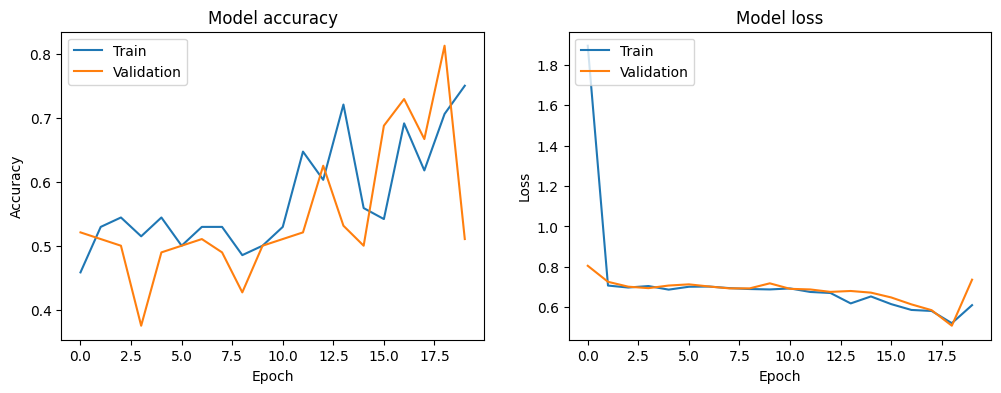

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

El comportamiento es similar.